In [118]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
import os
import re
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from torchvision.transforms import Normalize
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [83]:
# # Define the CNN model
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
#         self.fc1 = nn.Linear(32 * 16 * 16, 256)
#         self.fc2 = nn.Linear(256, 1)

#     def forward(self, x):
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
#         x = x.view(-1, 32 * 16 * 16)
#         x = torch.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x


In [84]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
#         self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.fc1 = nn.Linear(64 * 8 * 8, 512)
#         self.fc2 = nn.Linear(512, 256)
#         self.fc3 = nn.Linear(256, 1)

#     def forward(self, x):
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
#         x = self.pool(torch.relu(self.conv3(x)))
#         x = x.view(-1, 64 * 8 * 8)
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


In [85]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
#         self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
#         self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.fc1 = nn.Linear(128 * 4 * 4, 512)
#         self.fc2 = nn.Linear(512, 256)
#         self.fc3 = nn.Linear(256, 128)
#         self.fc4 = nn.Linear(128, 1)

#     def forward(self, x):
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
#         x = self.pool(torch.relu(self.conv3(x)))
#         x = self.pool(torch.relu(self.conv4(x)))
#         x = x.view(-1, 128 * 4 * 4)
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = torch.relu(self.fc3(x))
#         x = self.fc4(x)
#         return x

In [86]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 2 * 2, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = self.pool(torch.relu(self.conv4(x)))
        x = self.pool(torch.relu(self.conv5(x)))
        x = x.view(-1, 256 * 2 * 2)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [87]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
#         self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
#         self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
#         self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
#         self.conv6 = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.fc1 = nn.Linear(1024 * 1 * 1, 2048)
#         self.fc2 = nn.Linear(2048, 1024)
#         self.fc3 = nn.Linear(1024, 512)
#         self.fc4 = nn.Linear(512, 256)
#         self.fc5 = nn.Linear(256, 128)
#         self.fc6 = nn.Linear(128, 1)

#     def forward(self, x):
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
#         x = self.pool(torch.relu(self.conv3(x)))
#         x = self.pool(torch.relu(self.conv4(x)))
#         x = self.pool(torch.relu(self.conv5(x)))
#         x = self.pool(torch.relu(self.conv6(x)))
#         x = x.view(-1, 1024 * 1 * 1)
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = torch.relu(self.fc3(x))
#         x = torch.relu(self.fc4(x))
#         x = torch.relu(self.fc5(x))
#         x = self.fc6(x)
#         return x

In [88]:
# Create training dataset
# Set up the data directories
data_dir = 'Test_Images'
train_dir = os.path.join(data_dir, 'Train')

# Define a function to get the labels from the image filenames
def get_label(filename):
    match = re.search(r'\d+\.?\d*', filename)
    if match:
        return float(match.group())
    else:
        return None

# Define a list to store the image filenames and labels
train_data = []

# Iterate over the training images and add them to the list
for filename in os.listdir(train_dir):
    label = get_label(filename)
    if label is not None:
        train_data.append([os.path.join(train_dir, filename), label])

# Convert the list to a dataframe
train_df = pd.DataFrame(train_data, columns=['filename', 'label'])

# Save the dataframe to a CSV file
train_df.to_csv(os.path.join(data_dir, 'train.csv'), index=False)

In [89]:
class CustomImageDataset(Dataset):
    def __init__(self, csv_file, image_folder, transform=None):
        self.data = self._load_data(csv_file)
        self.image_folder = image_folder
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image_path, label = self.data[index]
        image = Image.open(image_path).convert("RGB")

        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def _load_data(self, csv_file):
    # Load and preprocess data from the CSV file
    # Example: Assuming the CSV file has two columns representing image paths and labels
        data = []
        with open(csv_file, 'r') as file:
            lines = file.readlines()
            for line in lines[1:]:  # Skip the header row
                # Split the line by comma or any other appropriate delimiter
                image_path, label = line.strip().split(',')
                data.append((image_path, float(label)))  # Parse the label as float
        return data

# # Access individual samples
# image, label = dataset[0]
# print(image.shape, label)

In [90]:
# psum    = torch.tensor([0.0, 0.0, 0.0])
# psum_sq = torch.tensor([0.0, 0.0, 0.0])

# # loop through images
# # for inputs in train_data:#DataLoader(train_data, batch_size=batch_size, shuffle=True):
# for i, (images, labels) in enumerate(train_loader):
#     psum    += images.sum(axis        = [0, 2, 3])
#     psum_sq += (images ** 2).sum(axis = [0, 2, 3])
    

# # Final Calculation
# # pixel count
# image_size = 256
# count = 870 * image_size * image_size

# # mean and std
# total_mean = psum / count
# total_var  = (psum_sq / count) - (total_mean ** 2)
# total_std  = torch.sqrt(total_var)

# # output
# print('mean: '  + str(total_mean))
# print('std:  '  + str(total_std))

In [91]:
# input_image = Image.open('Test_Images\Train\drop_s41_v5_r0.5_str6_pos0_cam150.png')  # Replace 'input_image.jpg' with the path to your input image file
# transform = ToTensor()
# tensor = transform(input_image)
# # Calculate mean and standard deviation
# mean = torch.mean(tensor)
# std = torch.std(tensor)

# # Normalize the data
# normalizer = Normalize(mean=[mean.item(), mean.item(), mean.item()], std=[std.item(), std.item(), std.item()])
# Set up the data
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize(mean= [0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])               # Need to be adjusted, acording to dataset
])


In [92]:
# Example usage:
csv_file = 'Test_Images/train.csv'  # Replace with the path to your CSV file
image_folder = 'Test_Images/train'  # Replace with the path to your image folder


# Split the dataset into training and validation sets
dataset = CustomImageDataset(csv_file, image_folder, transform=transform)
val_split = 0.2  # Percentage of data for validation
val_size = int(val_split * len(dataset))
train_size = len(dataset) - val_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])


# Create data loaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [93]:
# Define the loss function and optimizer
model = CNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=1, bias=True)
)

In [94]:
# num_epochs = 30
# best_val_loss = float('inf')
# patience = 5  # Number of epochs to wait for improvement
# counter = 0  # Counter to track the number of epochs without improvement

# for epoch in range(num_epochs):
#     running_loss = 0.0
    
#     # Training phase
#     model.train()
#     for i, (inputs, labels) in enumerate(train_loader, 0):
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         labels = labels.unsqueeze(1)
#         loss = criterion(outputs, labels.float())
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         if i % 100 == 99:
#             print('[%d, %5d] loss: %.6f' % (epoch + 1, i + 1, running_loss / 100))
#             running_loss = 0.0
            
#     # Validation phase
#     model.eval()
#     with torch.no_grad():
#         val_loss = 0.0
#         val_samples = 0
#         for inputs, labels in val_loader:
#             outputs = model(inputs)
#             labels = labels.unsqueeze(1)
#             loss = criterion(outputs, labels.float())
#             val_loss += loss.item() * inputs.size(0)
#             val_samples += inputs.size(0)
        
#         average_val_loss = val_loss / val_samples
#         print('Epoch %d - Validation Loss: %.6f' % (epoch + 1, average_val_loss))
        
#         # Check if validation loss improved
#         if average_val_loss < best_val_loss:
#             best_val_loss = average_val_loss
#             counter = 0
#             torch.save(model, 'trained_model')  # Save the best model
#         else:
#             counter += 1
#             if counter >= patience:
#                 print('No improvement in validation loss. Early stopping.')
#                 break
        
#     print('Epoch %d completed.' % (epoch + 1))

Epoch 1 - Training Loss: 906.734267 - Validation Loss: 77.848817
Epoch 1 completed.
Epoch 2 - Training Loss: 185.198487 - Validation Loss: 96.936724
Epoch 2 completed.
Epoch 3 - Training Loss: 173.513197 - Validation Loss: 92.193433
Epoch 3 completed.
Epoch 4 - Training Loss: 170.662989 - Validation Loss: 79.835877
Epoch 4 completed.
Epoch 5 - Training Loss: 157.909047 - Validation Loss: 75.188527
Epoch 5 completed.
Epoch 6 - Training Loss: 157.614254 - Validation Loss: 72.555566
Epoch 6 completed.
Epoch 7 - Training Loss: 137.817135 - Validation Loss: 79.811908
Epoch 7 completed.
Epoch 8 - Training Loss: 118.865231 - Validation Loss: 68.092137
Epoch 8 completed.
Epoch 9 - Training Loss: 97.258856 - Validation Loss: 34.483719
Epoch 9 completed.
Epoch 10 - Training Loss: 89.086605 - Validation Loss: 23.502294
Epoch 10 completed.
Epoch 11 - Training Loss: 62.230752 - Validation Loss: 7.982052
Epoch 11 completed.
Epoch 12 - Training Loss: 50.197457 - Validation Loss: 6.806829
Epoch 12 com

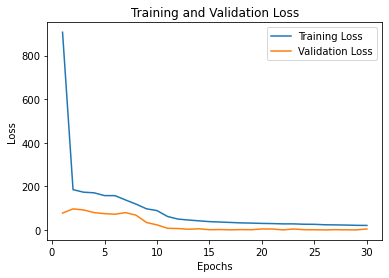

In [95]:
num_epochs = 30
best_val_loss = float('inf')
patience = 5  # Number of epochs to wait for improvement
counter = 0  # Counter to track the number of epochs without improvement

train_losses = []  # List to store training losses
val_losses = []  # List to store validation losses
epoch_numbers = [] # List to store epoch numbers

for epoch in range(num_epochs):
    running_loss = 0.0
    
    # Training phase
    model.train()
    for i, (inputs, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.unsqueeze(1)
        loss = criterion(outputs, labels.float())

        # L1 regularization
        l1_lambda = 0.01  # Adjust the L1 regularization strength
        l1_regularization = torch.tensor(0.)
        for param in model.parameters():
            l1_regularization += torch.norm(param, 1)
        loss += l1_lambda * l1_regularization

        # L2 regularization
        l2_lambda = 0.01  # Adjust the L2 regularization strength
        l2_regularization = torch.tensor(0.)
        for param in model.parameters():
            l2_regularization += torch.norm(param, 2)
        loss += l2_lambda * l2_regularization

        running_loss += loss.item()

        loss.backward()
        optimizer.step()

        if i % 100 == 99:
            print('[%d, %5d] loss: %.6f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
            
    # Validation phase
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        val_samples = 0
        for inputs, labels in val_loader:
            outputs = model(inputs)
            labels = labels.unsqueeze(1)
            loss = criterion(outputs, labels.float())
            val_loss += loss.item() * inputs.size(0)
            val_samples += inputs.size(0)
        
        average_val_loss = val_loss / val_samples
        # Append the losses to the lists
        train_losses.append(running_loss / len(train_loader))
        val_losses.append(average_val_loss)
        epoch_numbers.append(epoch + 1)  # Add the epoch number
        # print('Epoch %d - Validation Loss: %.6f' % (epoch + 1, average_val_loss))
        # Print the running loss and validation loss at the end of the epoch
        print('Epoch %d - Training Loss: %.6f - Validation Loss: %.6f' % (epoch + 1, running_loss / len(train_loader), average_val_loss))

        
        # Check if validation loss improved
        if average_val_loss < best_val_loss:
            best_val_loss = average_val_loss
            counter = 0
            torch.save(model.state_dict(), 'trained_model')  # Save the best model
            
        else:
            counter += 1
            if counter >= patience:
                print('No improvement in validation loss. Early stopping.')
                break
        
    print('Epoch %d completed.' % (epoch + 1))

# Plotting the losses
# epochs = range(1, num_epochs + 1)
plt.plot(epoch_numbers, train_losses, label='Training Loss')
plt.plot(epoch_numbers, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [102]:
model = torch.load('trained_model')  # Replace 'trained_model.pth' with the path to your trained model file

# Load and preprocess the input image
input_image = Image.open('Test_Images\Train\drop_s50_v5_r0.5_str6_pos0_cam97.png')  # Replace 'input_image.jpg' with the path to your input image file
input_image = input_image.convert('RGB')
input_tensor = transform(input_image)

# input_tensor = torchvision.transforms.ToTensor()(input_image).unsqueeze(0)  # Preprocess the image and add a batch dimension
input_tensor.shape

torch.Size([3, 64, 64])

In [103]:
model = CNN()  # Replace YourModel with your actual model class
# Load the trained weights
model.load_state_dict(torch.load('trained_model'))

# Access the weights
weights = model.state_dict()

# Print the weights
for name, param in weights.items():
    print(f'Weights:\n{param}')

Weights:
tensor([[[[ 2.0458e-01,  1.0712e-01, -1.6199e-02],
          [-9.6661e-02,  1.1826e-02, -4.3714e-02],
          [ 7.1984e-02,  3.2266e-02, -1.4705e-01]],

         [[ 1.9829e-01,  1.4850e-01, -1.2873e-01],
          [-1.4648e-02, -1.1291e-01, -1.0571e-02],
          [-1.9505e-01, -1.3644e-01, -4.1874e-02]],

         [[ 1.5587e-01,  1.2809e-01, -3.4059e-02],
          [-5.5387e-02,  5.2759e-02, -1.9822e-02],
          [-9.8120e-03, -2.4485e-01, -1.5621e-02]]],


        [[[ 9.8776e-02, -6.4533e-02, -8.0835e-02],
          [-7.1482e-02, -6.2858e-02,  8.5023e-02],
          [ 1.0388e-01,  1.0597e-01,  1.2392e-01]],

         [[-1.0790e-01, -1.6153e-01,  5.1123e-02],
          [ 9.3851e-02,  8.7615e-02,  6.9930e-02],
          [-3.4729e-02, -4.9729e-02,  2.2523e-02]],

         [[-1.2128e-01, -3.1908e-02,  1.3637e-02],
          [ 1.0544e-01, -1.2761e-01,  1.7931e-01],
          [ 1.8119e-01, -1.8351e-01, -9.0565e-02]]],


        [[[ 3.8149e-02,  3.0049e-02,  8.4296e-02],
      

In [104]:
# Set the model in evaluation mode
model.eval()

# Make a prediction
with torch.no_grad():
    output = model(input_tensor)

# Convert the output to a readable format
predicted_value = output.item()

# Print the predicted value
print('Predicted value:', predicted_value)

Predicted value: 50.17097473144531


In [111]:
# Set the device for computation (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame(columns=['Image', 'Real Value', 'Predicted Value', 'Difference'])

# Iterate over the figures in the folder
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust the file extensions as per your figures
        image_path = os.path.join(image_folder, filename)
        
        # Load and preprocess the image
        image = Image.open(image_path).convert('RGB')
        input_tensor = transform(image).unsqueeze(0).to(device)
        
        # Extract the real value from the filename
        real_value = int(filename.split('_')[1][1:])  # Adjust the splitting pattern to extract the desired value
        
        # Make the prediction
        with torch.no_grad():
            output = model(input_tensor)
        predicted_value = output.item()
        
        # Calculate the difference between predicted and real value
        difference = predicted_value - real_value

        # Add the prediction, real value, and difference to the DataFrame
        predictions_df = predictions_df.append({'Image': filename, 'Real Value': real_value, 'Predicted Value': predicted_value, 'Difference': difference}, ignore_index=True)

# Print the predictions table
print(predictions_df)

                                     Image Real Value  Predicted Value  \
0      drop_s40_v5_r0.5_str6_pos0_cam0.png         40        42.790405   
1      drop_s40_v5_r0.5_str6_pos0_cam1.png         40        41.936745   
2     drop_s40_v5_r0.5_str6_pos0_cam10.png         40        40.764248   
3     drop_s40_v5_r0.5_str6_pos0_cam11.png         40        40.292324   
4     drop_s40_v5_r0.5_str6_pos0_cam12.png         40        39.862171   
...                                    ...        ...              ...   
3095  drop_s70_v5_r0.5_str6_pos0_cam95.png         70        68.444260   
3096  drop_s70_v5_r0.5_str6_pos0_cam96.png         70        67.928711   
3097  drop_s70_v5_r0.5_str6_pos0_cam97.png         70        67.376495   
3098  drop_s70_v5_r0.5_str6_pos0_cam98.png         70        66.703018   
3099  drop_s70_v5_r0.5_str6_pos0_cam99.png         70        66.072632   

      Difference  
0       2.790405  
1       1.936745  
2       0.764248  
3       0.292324  
4      -0.137829

Mean Squared Error (MSE): 0.5664373599050609


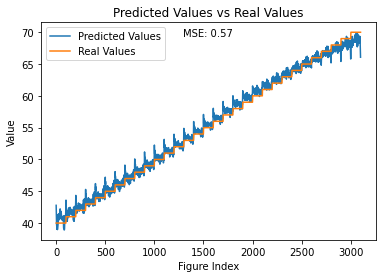

In [116]:
# Extract the real and predicted values from the DataFrame
real_values = predictions_df['Real Value']
predicted_values = predictions_df['Predicted Value']

# Calculate the mean squared error (MSE)
differences = predictions_df['Difference']
mse = np.mean(differences ** 2)

# Print MSE
print('Mean Squared Error (MSE):', mse)

# Plot the predicted values and the real values
plt.plot(predicted_values, label='Predicted Values')
plt.plot(real_values, label='Real Values')
plt.xlabel('Figure Index')
plt.ylabel('Value')
plt.title('Predicted Values vs Real Values')
plt.legend()

# Display the MSE in the plot
plt.text(0.5, 0.95, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

MSE per Real Value:
Real Value
40    1.294025
41    0.773914
42    0.571262
43    0.486373
44    0.460810
45    0.456681
46    0.452056
47    0.445681
48    0.410131
49    0.380680
50    0.361458
51    0.340121
52    0.330672
53    0.354283
54    0.378953
55    0.427394
56    0.483140
57    0.573771
58    0.636821
59    0.662157
60    0.624925
61    0.534108
62    0.438765
63    0.310868
64    0.204894
65    0.133511
66    0.162328
67    0.334647
68    0.711054
69    1.389540
70    2.434535
Name: Difference, dtype: float64


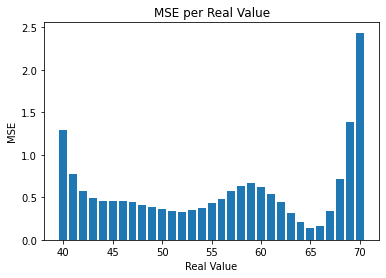

In [120]:
# Calculate the MSE per real value
mse_per_real_value = predictions_df.groupby('Real Value')['Difference'].apply(lambda x: mean_squared_error(x, np.zeros_like(x)))

# Print the MSE per real value
print('MSE per Real Value:')
print(mse_per_real_value)

# Plot the MSE per real value
plt.bar(mse_per_real_value.index, mse_per_real_value)
plt.xlabel('Real Value')
plt.ylabel('MSE')
plt.title('MSE per Real Value')

# Show the plot
plt.show()